In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

df=pd.read_csv("train.csv")


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
len(df)

418

In [9]:
df.shape

(418, 12)

In [15]:
print("Total no. of passenger" +" "+ str(len(df)))

Total no. of passenger 418


# Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

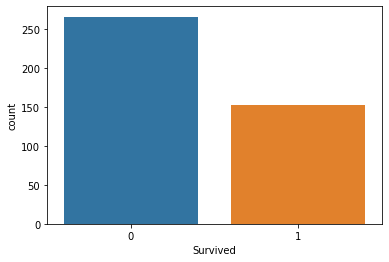

In [18]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

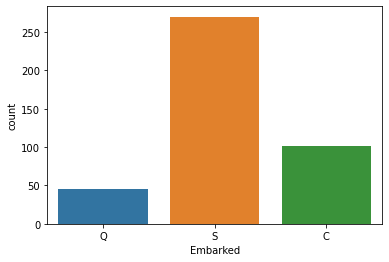

In [19]:
sns.countplot(x='Embarked',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

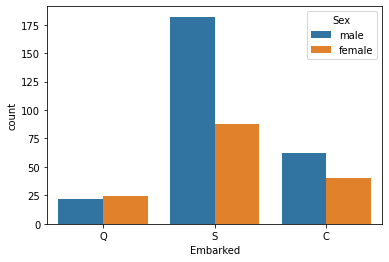

In [21]:
sns.countplot(x='Embarked',hue="Sex",data=df)

<AxesSubplot:ylabel='Frequency'>

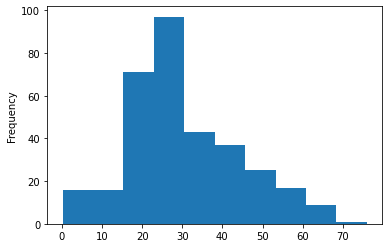

In [26]:
df["Age"].plot.hist()

In [28]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


# Data wrangling

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
df.drop("Cabin",axis=1,inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
409,0
411,0
412,0
414,0


In [47]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)

In [48]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)

In [49]:
df=pd.concat([df,sex,embark,pcl],axis=1)

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,0,0,1,0,1
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q,0,1,0,0,0
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,0,0,1,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,0,0,0,0


In [55]:
df.drop(['Sex','Embarked',"PassengerId",'Name'],axis=1,inplace=True)

KeyError: "['Sex' 'Embarked' 'PassengerId' 'Name'] not found in axis"

In [53]:
df


,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,3,34.5,0,0,330911,7.8292,1,1,0,0,1
1,1,3,47.0,1,0,363272,7.0000,0,0,1,0,1
2,0,2,62.0,0,0,240276,9.6875,1,1,0,1,0
3,0,3,27.0,0,0,315154,8.6625,1,0,1,0,1
4,1,3,22.0,1,1,3101298,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1,3,3.0,1,1,SOTON/O.Q. 3101315,13.7750,0,0,1,0,1
411,1,1,37.0,1,0,19928,90.0000,0,1,0,0,0
412,1,3,28.0,0,0,347086,7.7750,0,0,1,0,1
414,1,1,39.0,0,0,PC 17758,108.9000,0,0,0,0,0


In [56]:
df.drop(['Pclass'],axis=1,inplace=True)

In [57]:
df

,Survived,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,34.5,0,0,330911,7.8292,1,1,0,0,1
1,1,47.0,1,0,363272,7.0000,0,0,1,0,1
2,0,62.0,0,0,240276,9.6875,1,1,0,1,0
3,0,27.0,0,0,315154,8.6625,1,0,1,0,1
4,1,22.0,1,1,3101298,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
409,1,3.0,1,1,SOTON/O.Q. 3101315,13.7750,0,0,1,0,1
411,1,37.0,1,0,19928,90.0000,0,1,0,0,0
412,1,28.0,0,0,347086,7.7750,0,0,1,0,1
414,1,39.0,0,0,PC 17758,108.9000,0,0,0,0,0


In [90]:
df.drop(["Ticket"],axis=1,inplace=True)
df


,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
409,1,3.0,1,1,13.7750,0,0,1,0,1
411,1,37.0,1,0,90.0000,0,1,0,0,0
412,1,28.0,0,0,7.7750,0,0,1,0,1
414,1,39.0,0,0,108.9000,0,0,0,0,0


In [97]:
df

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
409,1,3.0,1,1,13.7750,0,0,1,0,1
411,1,37.0,1,0,90.0000,0,1,0,0,0
412,1,28.0,0,0,7.7750,0,0,1,0,1
414,1,39.0,0,0,108.9000,0,0,0,0,0


In [98]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [99]:
from sklearn import model_selection

from sklearn.model_selection import train_test_split


In [100]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
logmodel=LogisticRegression()

In [103]:
logmodel.fit(X_train, y_train)

C:\Users\91705\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
predictions=logmodel.predict(X_test)

In [105]:
from sklearn.metrics import classification_report

In [106]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test,predictions)

array([[57,  0],
       [ 0, 43]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(y_test,predictions)

1.0